In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
data = w.wsd('881001.WI', 'close', '2004-01-01', '2019-03-25')

In [4]:
df = pd.DataFrame(np.array(data.Data).T, columns=['close'], index=data.Times)

In [5]:
df.index = pd.to_datetime(df.index)

In [42]:
df['ret'] = df['close'].pct_change()
df['autocorr'] = df['ret'].rolling(window=242).apply(lambda x: pd.Series(x).autocorr(20))

In [48]:
autocorr = df['close'].resample('M').last().pct_change().rolling(12).apply(lambda x: pd.Series(x).autocorr(1))

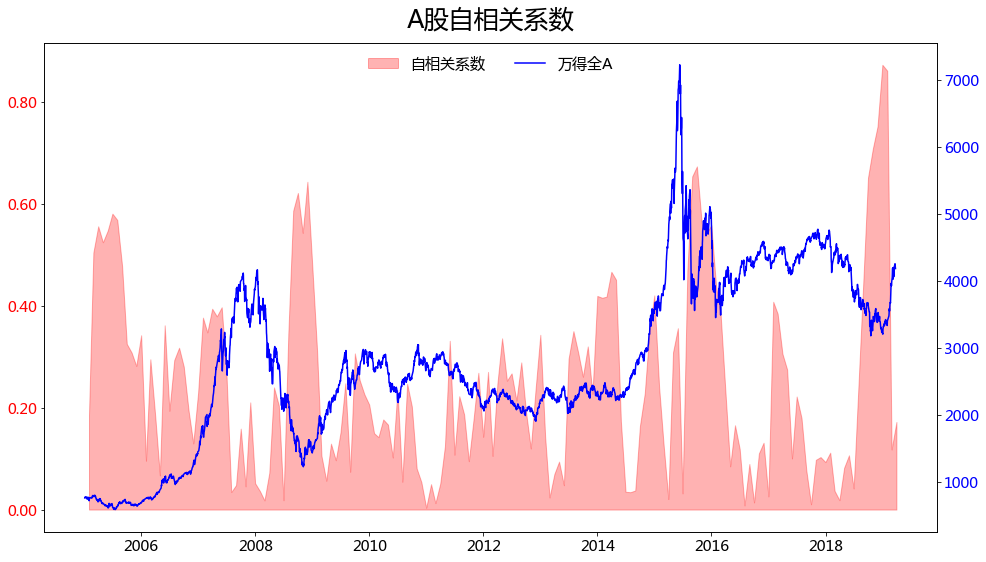

In [104]:
fig, ax = plt.subplots(figsize=(16, 9))
# ax.bar(autocorr.index, autocorr.abs(), width=5, color='red', label=u'自相关系数')
lns1 = ax.fill_between(autocorr.index, 0, autocorr.abs(), color='red', label=u'自相关系数', alpha=0.3)
# ax.legend(loc='upper center', fontsize=15)
axx = ax.twinx()
lns2 = axx.plot(df[df.index >= '2005-01-01']['close'], color='blue', label=u'万得全A')
# axx.legend(loc='upper left', fontsize=20)
lns = [lns1] + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals], color='red')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='blue')
_ = ax.set_title(u'A股自相关系数', fontsize=25, y=1.02)